In [1]:
from utils_excel import read_log_databaseloader as databaseloader
import numpy as np
from utils_calculation import calculator

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
check_line_list = [163,183,3,63,83,103,23,43,207,227,247,267,287,143,123]
# check_line_list = [306,326,346,386]
bar_width = 0.4
save_root_path = 'statistics_figure_int8/'
rld = databaseloader(file_path='../log/arc3_cpu_test_database.xls')
rld_float32 = databaseloader()
c = calculator()
check_float32_line_inception_list = [243,263,83,143,163,183,103,123,283,323,363,403,444,223,203]
# rld_float32 = databaseloader()
plt_hight = 5.5


In [2]:
def modelpath2modelname(model_path):  #transform float32 model path to model name
    if model_path == '../quantization_models/inception_v3.pth':
        model_name = 'inception_v3'
    else:
        model_name = ((model_path.split("/")[1]).split("scripted")[0])[:-1].replace('_quantization', '')
    return model_name

In [3]:
def get_cuda_memory_usage_data(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = modelpath2modelname(model_path)
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_model_cuda_memory_usage,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'mobilenetv2', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'vgg11_bn', 'vgg13_bn', 'vgg16_bn', 'vgg19_bn', 'inception_v3', 'resnext50_32x4d', 'resnext101_32x8d']
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


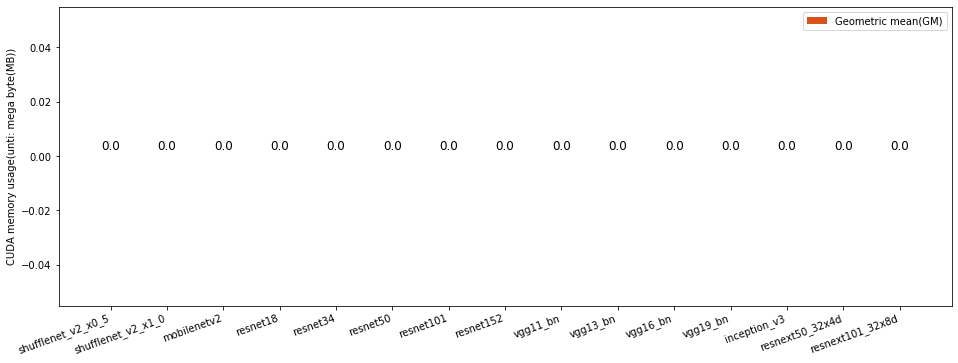

In [4]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_cuda_memory_usage_data(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,plt_hight))

bar = plt.bar(x, model_geo_mean_list, bar_width, color=(217/256, 83/256, 25/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_geo_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 2), ha='center', va='bottom', fontsize=12)
    
plt.xticks(rotation=20)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([bar], ["Geometric mean(GM)"], loc='upper right')

plt.ylabel('CUDA memory usage(unti: mega byte(MB))')
plt.savefig(save_root_path + "CUDA memory usage.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [5]:
def get_host_memory_usage_data(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = modelpath2modelname(model_path)
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_model_host_memory_usage,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'mobilenetv2', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'vgg11_bn', 'vgg13_bn', 'vgg16_bn', 'vgg19_bn', 'inception_v3', 'resnext50_32x4d', 'resnext101_32x8d']
[8.917969, 17.630209, 13.915039, 19.067383, 35.019337, 45.53301, 89.057816, 125.72324, 143.68184, 136.47383, 138.17383, 144.02188, 300.29648, 39.8666, 163.61015]
[0.42082630930435627, 0.2077549196901849, 0.011263423952362572, 0.012925232412637655, 0.038261242950220264, 0.015817496522863905, 0.034961891084464014, 0.005299901085365377, 0.7339023602096688, 2.2042533613144997, 0.004129954997807772, 0.007242343576535859, 1.5272083288303406, 0.017788207546793444, 3.5290683402882053]
[8.847741828165686, 17.61864626624313, 13.915007030745947, 19.0673519309189, 35.019189062738114, 45.53298853420408, 89.05776428984535, 125.72324140284039, 143.66866272437272, 136.3515462500975, 138.1738276915251, 144.0218737209798, 300.2689623054202, 39.86657371202589, 163.3611489658121]
[0.4

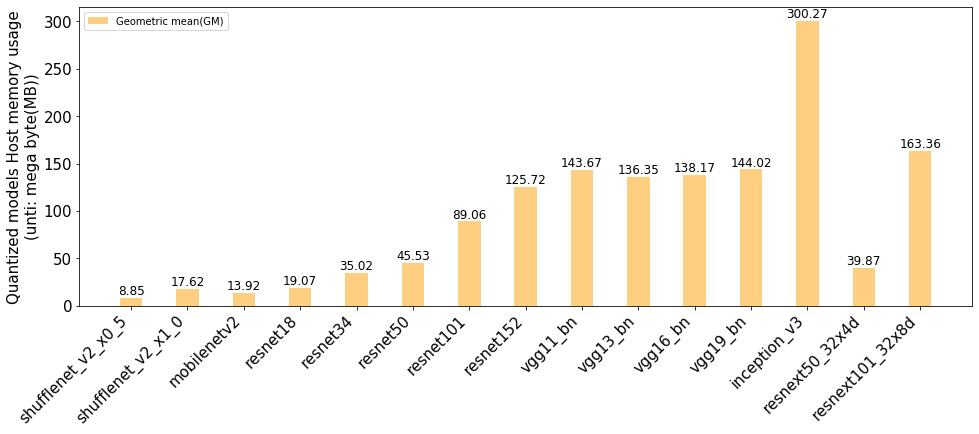

In [6]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_host_memory_usage_data(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,plt_hight))

bar = plt.bar(x, model_geo_mean_list, bar_width, color=(255/256, 208/256, 128/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_geo_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 2), ha='center', va='bottom', fontsize=12)
    
plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([bar], ["Geometric mean(GM)"], loc='upper left')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Quantized models Host memory usage\n(unti: mega byte(MB))',fontsize = 15)
plt.savefig(save_root_path + "Host memory usage.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [7]:
def get_storage_usage(estimate_line_list = []):# need to fill up all the size parameters
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = modelpath2modelname(model_path)
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_size,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'mobilenetv2', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'vgg11_bn', 'vgg13_bn', 'vgg16_bn', 'vgg19_bn', 'inception_v3', 'resnext50_32x4d', 'resnext101_32x8d']
[1.44, 2.36, 3.63, 11.26, 20.96, 24.78, 43.23, 58.49, 126.89, 127.07, 132.16, 137.24, 26.26, 24.37, 86.05]
[0.0, 0.0, 0.0, 0.0, 0.0, 3.552713678800501e-15, 0.0, 0.0, 0.0, 1.4210854715202004e-14, 0.0, 2.842170943040401e-14, 0.0, 0.0, 0.0]
[1.44, 2.36, 3.6300000000000003, 11.260000000000002, 20.960000000000004, 24.780000000000005, 43.230000000000004, 58.490000000000016, 126.89000000000003, 127.07000000000002, 132.16000000000003, 137.24000000000004, 26.260000000000005, 24.370000000000005, 86.05000000000001]
[0.0, 0.0, 0.0, 0.0, 0.0, 3.552713678800501e-15, 0.0, 0.0, 0.0, 1.4210854715202004e-14, 0.0, 2.842170943040401e-14, 0.0, 0.0, 0.0]


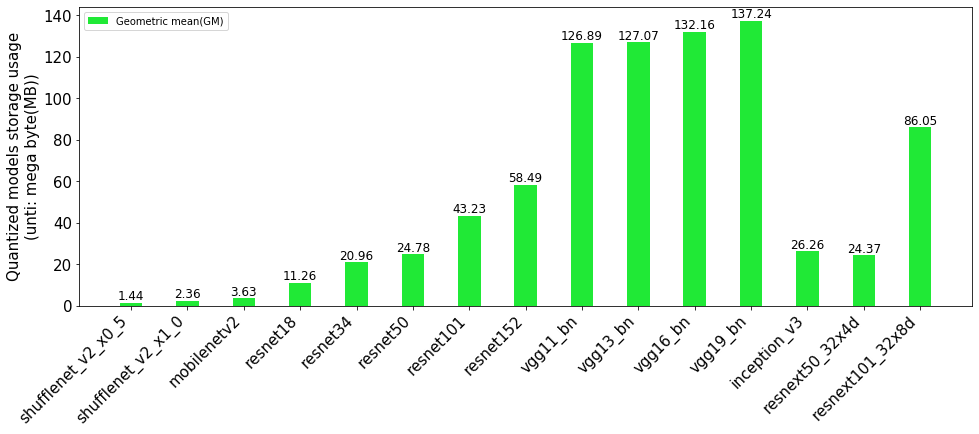

In [8]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_storage_usage(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,5.5))

bar = plt.bar(x, model_geo_mean_list, bar_width, color=(32/256, 234/256, 54/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_geo_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)
    
plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([bar], ["Geometric mean(GM)"], loc='upper left')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Quantized models storage usage\n(unti: mega byte(MB))',fontsize = 15)
plt.savefig(save_root_path + "storage usage.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [9]:
def get_float32_storage_usage(estimate_line_list = []):# need to fill up all the size parameters
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld_float32.read_model_path(current_estimate_line)
        current_model_name = ((model_path.split("/")[1]).split("pretrained")[0])[:-1]# transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld_float32.find_special_line_id(model_path)
        current_model_result_list = rld_float32.read_line_vector(rld_float32.read_size,select_model_id_list)

        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

[72.83018868 73.2122588  73.11111111 74.75336323 74.80769231 74.63664278
 74.57058824 74.56956522 74.9229249  74.93688363 74.92220114 74.95620438
 74.71352913 74.53500522 74.61651917]


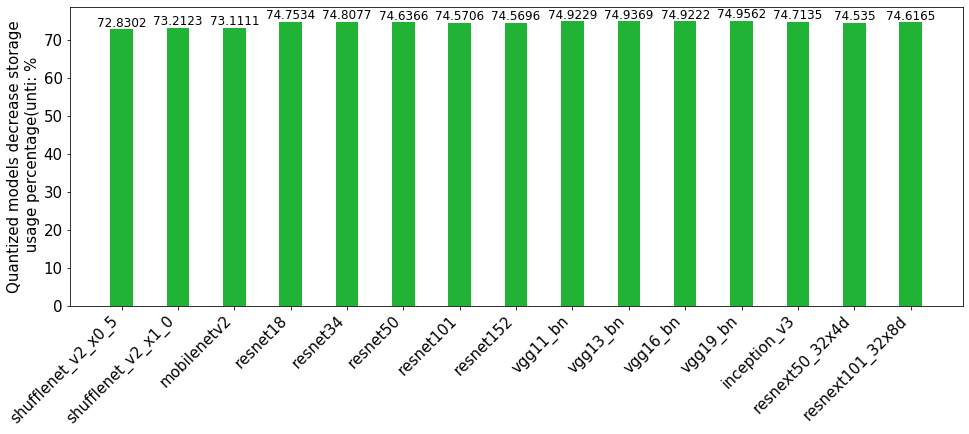

In [10]:
model_name_list, model_mean_list, model_mean_confinterval, model_float32_geo_mean_list, model_geo_mean_confinterval = get_float32_storage_usage(check_float32_line_inception_list)
decrease_storage_usage_percentage =  (1 - np.array(model_geo_mean_list)/ np.array(model_float32_geo_mean_list))*100
print(decrease_storage_usage_percentage)


x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,5.5))

bar = plt.bar(x, decrease_storage_usage_percentage, bar_width, color=(32/256, 180/256, 54/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, decrease_storage_usage_percentage):
    plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)
    
plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Quantized models decrease storage\n usage percentage(unti: %',fontsize = 15)
plt.savefig(save_root_path + "decrease storage usage.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [11]:
def get_inference_time(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = modelpath2modelname(model_path)
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_Inference_time,select_model_id_list)

        ## mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        ## Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'mobilenetv2', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'vgg11_bn', 'vgg13_bn', 'vgg16_bn', 'vgg19_bn', 'inception_v3', 'resnext50_32x4d', 'resnext101_32x8d']
[1.3735102, 1.4175489, 1.2261797, 0.10326715, 0.21475525, 0.43415016, 1.2994367, 3.0065465, 0.19788425, 0.1643395, 0.1654739, 0.2327421, 0.09754175, 0.4424097, 1.4423496]
[0.019239390459841355, 0.022291147134561484, 0.058799617640336255, 0.004283316306376531, 0.005507022610671847, 0.0892503416984759, 0.04725901766072882, 0.05501950691176116, 0.025738698510043956, 0.010393648715850218, 0.007237146680302509, 0.02670129580861713, 0.009385922651025821, 0.0405356743879699, 0.060083490413869844]
[1.3725833273164796, 1.4161095146515457, 1.2182002379313464, 0.10265709858635018, 0.2142827481675008, 0.4038187914960598, 1.2942786089710574, 3.003090420598508, 0.1892365330855404, 0.1621281174710243, 0.1643716748838541, 0.22337303801782563, 0.0946940436656995, 0.4320577275009711

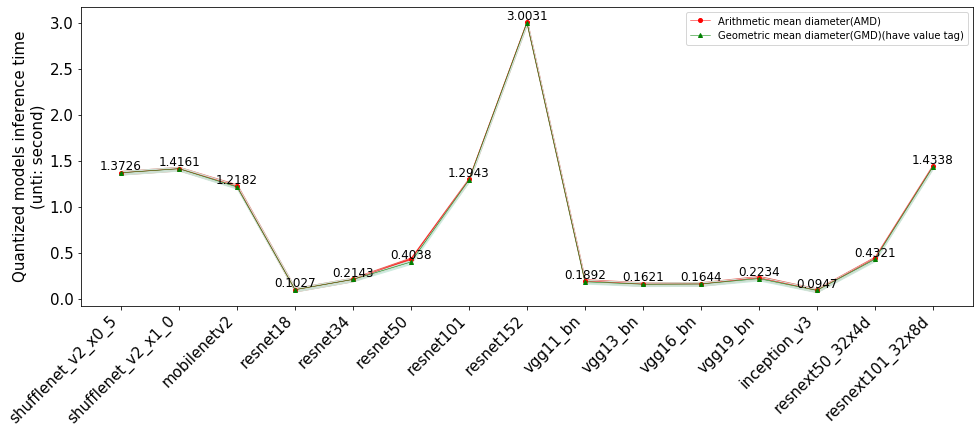

In [12]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_inference_time(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)


x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,5.5))

line1, = plt.plot(x_lable, model_mean_list, color='red', lw=0.5, ls='-', marker='o', ms=4)
line2, = plt.plot(x_lable, model_geo_mean_list, color='green', lw=0.5,  marker='^', ms=4)

plt.fill_between(x_lable, model_mean_list - model_mean_confinterval[0],model_mean_list + model_mean_confinterval[0], color=(240/256, 86/256, 79/256), alpha=0.9)
plt.fill_between(x_lable, model_geo_mean_list - model_geo_mean_confinterval[0], model_geo_mean_list + model_geo_mean_confinterval[0], color=(204/256, 236/256, 223/256), alpha=0.9)

#set second line show figure
for a, b in zip(x_lable, model_geo_mean_list):
    plt.text(a, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend([line1, line2], ["Arithmetic mean diameter(AMD)", "Geometric mean diameter(GMD)(have value tag)"], loc='upper right')

plt.ylabel('Quantized models inference time\n(unti: second)',fontsize = 15)
plt.savefig(save_root_path + "Model inference time.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [13]:
def get_running_time(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = modelpath2modelname(model_path)
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_running_time,select_model_id_list)

        ## mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        ## Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'mobilenetv2', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'vgg11_bn', 'vgg13_bn', 'vgg16_bn', 'vgg19_bn', 'inception_v3', 'resnext50_32x4d', 'resnext101_32x8d']
[1265.5763, 1359.6356, 957.43854, 838.76355, 764.55414, 917.46826, 1474.961, 1922.1678, 1367.247, 1456.7505, 1683.4266, 2521.4043, 1178.618, 1392.287, 3647.0715]
[59.08030715955306, 43.37447768827633, 33.09456290977232, 29.87968729863394, 30.063167019875095, 52.46708273251386, 177.26372893927305, 38.9731852903044, 31.886854358197752, 34.70832244490998, 16.224141651810214, 202.2221720452385, 23.530362803247726, 58.0165476033369, 242.0005185379723]
[1256.4516145535752, 1354.065203803873, 953.5003695695605, 835.1982970866782, 760.8986111711138, 907.1653074299916, 1429.9426203734624, 1919.4347833758022, 1364.6677432670092, 1453.904057790458, 1682.8837798735028, 2467.7806191447585, 1177.0085483809878, 1384.025590696632, 3589.9018616505114]
[62.10747020309668, 45.1944666

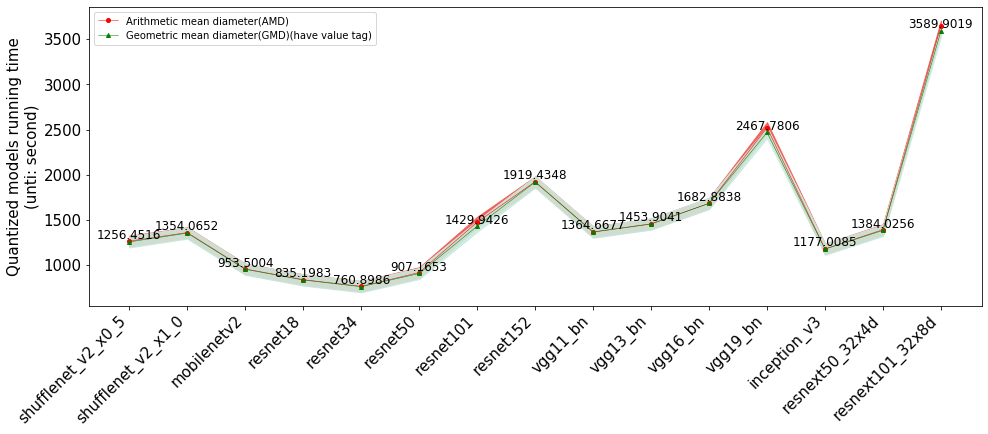

In [14]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_running_time(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)


x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,5.5))

line1, = plt.plot(x_lable, model_mean_list, color='red', lw=0.5, ls='-', marker='o', ms=4)
line2, = plt.plot(x_lable, model_geo_mean_list, color='green', lw=0.5,  marker='^', ms=4)

plt.fill_between(x_lable, model_mean_list - model_mean_confinterval[0],model_mean_list + model_mean_confinterval[0], color=(240/256, 86/256, 79/256), alpha=0.9)
plt.fill_between(x_lable, model_geo_mean_list - model_geo_mean_confinterval[0], model_geo_mean_list + model_geo_mean_confinterval[0], color=(204/256, 236/256, 223/256), alpha=0.9)

#set second line show figure
for a, b in zip(x_lable, model_geo_mean_list):
    plt.text(a, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([line1, line2], ["Arithmetic mean diameter(AMD)", "Geometric mean diameter(GMD)(have value tag)"], loc='upper left')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Quantized models running time\n(unti: second)', fontsize = 15)
plt.savefig(save_root_path + "Model running time.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [15]:
def get_Top1_accuracy_data(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = modelpath2modelname(model_path)
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_Top1_Accuracy,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'mobilenetv2', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'vgg11_bn', 'vgg13_bn', 'vgg16_bn', 'vgg19_bn', 'inception_v3', 'resnext50_32x4d', 'resnext101_32x8d']
[58.148, 67.784, 67.272, 69.4918, 73.072, 75.77, 76.972, 77.856, 70.126, 71.368, 73.182, 73.984, 69.38, 77.324, 79.072]
[7.105427357601002e-15, 0.0, 0.0, 0.00040642409835811577, 1.4210854715202004e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4210854715202004e-14, 0.0, 1.4210854715202004e-14]
[58.14800000000002, 67.78399999999999, 67.27200000000002, 69.4917999916537, 73.07200000000002, 75.77000000000001, 76.97200000000001, 77.85600000000001, 70.12600000000002, 71.36800000000001, 73.18200000000002, 73.98400000000001, 69.38000000000001, 77.32400000000001, 79.07200000000002]
[7.105427357601002e-15, 0.0, 0.0, 0.00042724849940611875, 1.4210854715202004e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4210854715202004e-14, 0.0, 1.4210854715202004e-14]


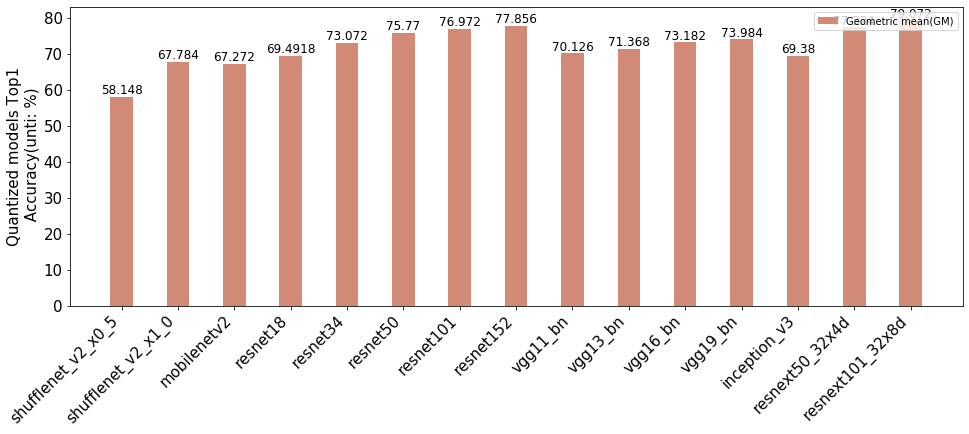

In [16]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_Top1_accuracy_data(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,5.5))

bar = plt.bar(x, model_geo_mean_list, bar_width, color=(210/256, 139/256, 118/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_geo_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)


plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([bar], ["Geometric mean(GM)"], loc='upper right')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Quantized models Top1\n Accuracy(unti: %)', fontsize = 15)
plt.savefig(save_root_path + "Top1 Accuracy.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [17]:
def get_float32_model_Top1_accuracy_data(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld_float32.read_model_path(current_estimate_line)
        current_model_name = modelpath2modelname(model_path)
        model_name_list.append(current_model_name)
        select_model_id_list = rld_float32.find_special_line_id(model_path)
        current_model_result_list = rld_float32.read_line_vector(rld_float32.read_Top1_Accuracy,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

[2.404      1.578      4.606      0.26620001 0.242      0.36
 0.402      0.456      0.244      0.218      0.178      0.234
 0.484      0.294      0.24      ]


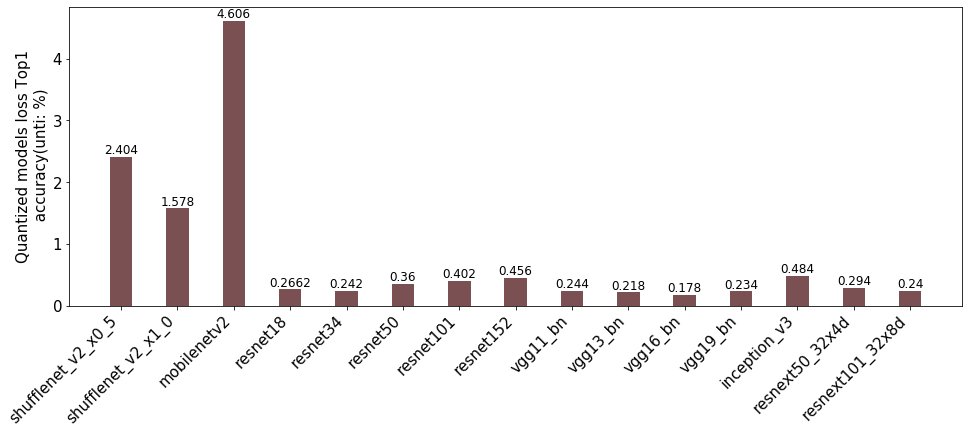

In [18]:
model_name_list1, model_mean_list, model_mean_confinterval, model_float32_geo_mean_list, model_geo_mean_confinterval = get_float32_model_Top1_accuracy_data(check_float32_line_inception_list)
decrease_percentage =  np.array(model_float32_geo_mean_list) - np.array(model_geo_mean_list)
print(decrease_percentage)


x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,5.5))

bar = plt.bar(x, decrease_percentage, bar_width, color=(123/256, 80/256, 83/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, decrease_percentage):
    plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)
    
plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Quantized models loss Top1\n accuracy(unti: %)', fontsize = 15)
plt.savefig(save_root_path + "loss Top1 accuracy.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [19]:
def get_Top5_accuracy_data(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = modelpath2modelname(model_path)
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_Top5_Accuracy,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'mobilenetv2', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'vgg11_bn', 'vgg13_bn', 'vgg16_bn', 'vgg19_bn', 'inception_v3', 'resnext50_32x4d', 'resnext101_32x8d']
[79.908, 87.142, 87.672, 88.952, 91.39, 92.878, 93.4, 93.856, 89.59, 90.242, 91.418, 91.784, 88.446, 93.66, 94.448]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4210854715202004e-14, 0.0, 0.0, 0.0, 0.0]
[79.90800000000002, 87.14199999999997, 87.67200000000003, 88.95200000000003, 91.39000000000003, 92.87800000000003, 93.40000000000003, 93.85600000000002, 89.59000000000003, 90.24200000000003, 91.41800000000003, 91.78400000000003, 88.44600000000001, 93.66000000000003, 94.44800000000002]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4210854715202004e-14, 0.0, 0.0, 0.0, 0.0]


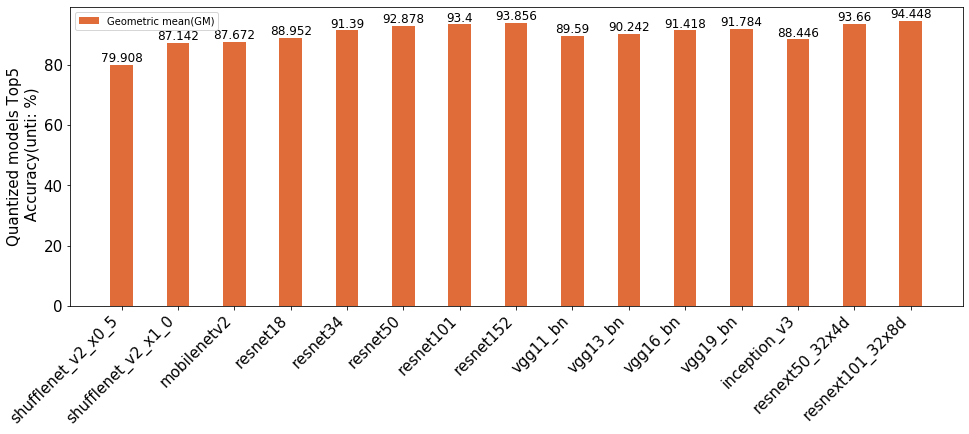

In [20]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_Top5_accuracy_data(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,5.5))

bar = plt.bar(x, model_geo_mean_list, bar_width, color=(225/256, 108/256, 57/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_geo_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)


plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([bar], ["Geometric mean(GM)"], loc='upper left')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Quantized models Top5\n Accuracy(unti: %)', fontsize = 15)
plt.savefig(save_root_path + "Top5 Accuracy.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [21]:
def get_float32_model_Top5_accuracy_data(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld_float32.read_model_path(current_estimate_line)
        current_model_name = modelpath2modelname(model_path)
        model_name_list.append(current_model_name)
        select_model_id_list = rld_float32.find_special_line_id(model_path)
        current_model_result_list = rld_float32.read_line_vector(rld_float32.read_Top5_Accuracy,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

[ 1.838  1.174  2.614  0.124  0.03  -0.016  0.146  0.19   0.22   0.132
  0.098  0.058  0.456  0.038  0.078]


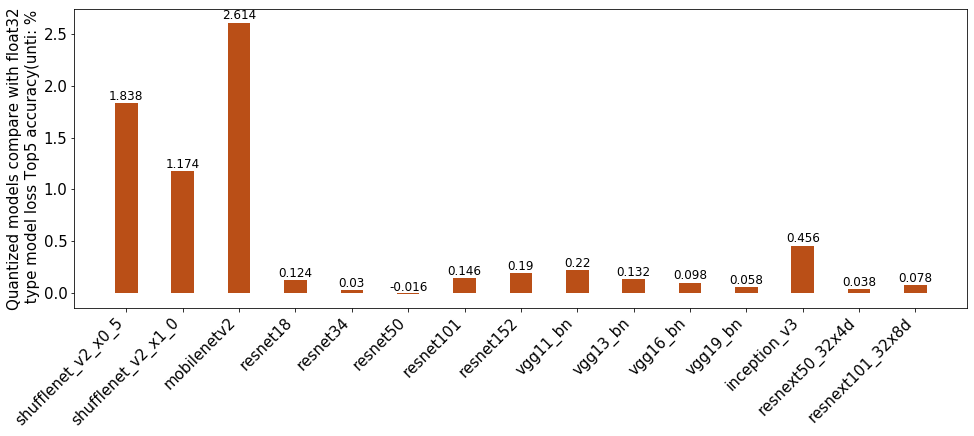

In [22]:
model_name_list1, model_mean_list, model_mean_confinterval, model_float32_geo_mean_list, model_geo_mean_confinterval = get_float32_model_Top5_accuracy_data(check_float32_line_inception_list)
decrease_percentage = np.array(model_float32_geo_mean_list) - np.array(model_geo_mean_list)
print(decrease_percentage)


x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,5.5))

bar = plt.bar(x, decrease_percentage, bar_width, color=(187/256, 79/256, 23/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, decrease_percentage):
    plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)
    
plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Quantized models compare with float32\n type model loss Top5 accuracy(unti: %', fontsize = 15)
plt.savefig(save_root_path + "loss Top5 accuracy.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [23]:
def get_crossentropy_loss_data(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = modelpath2modelname(model_path)
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_cross_entropy_loss,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'mobilenetv2', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'vgg11_bn', 'vgg13_bn', 'vgg16_bn', 'vgg19_bn', 'inception_v3', 'resnext50_32x4d', 'resnext101_32x8d']
[0.00961653, 0.00732806, 0.00682862, 0.0063035637, 0.00544668, 0.00486734, 0.00464865, 0.0044790474, 0.00605213, 0.00577213, 0.00537508, 0.00525566, 0.00920708, 0.00475789, 0.0046635196]
[0.0, 0.0, 0.0, 2.7407011894339806e-09, 0.0, 0.0, 0.0, 1.6339963887154751e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.224268132836499e-10]
[0.009616529999999998, 0.007328060000000002, 0.006828619999999998, 0.006303563499995814, 0.005446679999999998, 0.004867339999999999, 0.004648649999999998, 0.004479047499997906, 0.0060521299999999984, 0.005772129999999999, 0.005375079999999998, 0.005255659999999998, 0.009207079999999998, 0.004757889999999998, 0.004663519499999489]
[0.0, 0.0, 0.0, 2.881129527662618e-09, 0.0, 0.0, 0.0, 1.7177192689066256e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.64566405446576

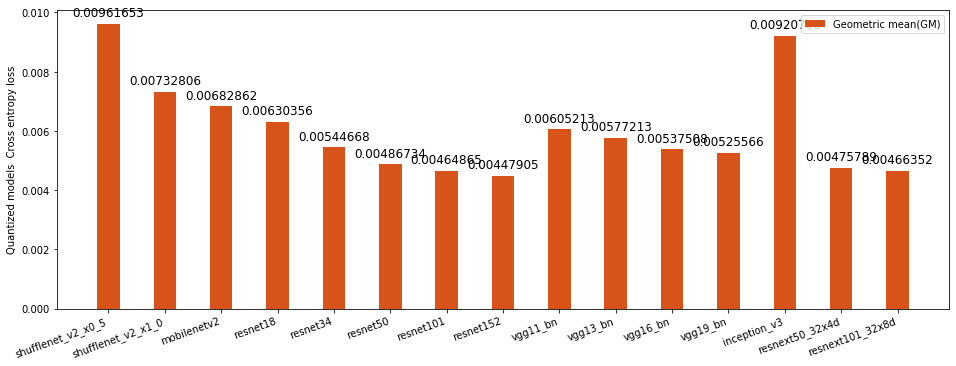

In [24]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_crossentropy_loss_data(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,5.5))

bar = plt.bar(x, model_geo_mean_list, bar_width, color=(217/256, 83/256, 25/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_geo_mean_list):
    plt.text(x_axis, b+0.00015, round(b, 8), ha='center', va='bottom', fontsize=12)


plt.xticks(rotation=20)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([bar], ["Geometric mean(GM)"], loc='upper right')

plt.ylabel('Quantized models  Cross entropy loss')
plt.savefig(save_root_path +"Cross entropy loss.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [25]:
def get_f1_score(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = modelpath2modelname(model_path)
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        a = rld.read_line_vector(rld.read_F1_score,select_model_id_list)
        current_model_result_list= eval('['+str(a).replace(' ','').replace('[','').replace(']','')+']')
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'mobilenetv2', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'vgg11_bn', 'vgg13_bn', 'vgg16_bn', 'vgg19_bn', 'inception_v3', 'resnext50_32x4d', 'resnext101_32x8d']
[0.5760184, 0.673757, 0.6696455, 0.6908906, 0.7270876, 0.7546544, 0.7667998, 0.7762495, 0.6966344, 0.7095961, 0.7283671, 0.7365202, 0.6892589, 0.7708864, 0.7877295]
[0.001992023141753063, 0.0017337585309489256, 0.0018704680421173236, 0.0018420846819613423, 0.0017887674718697344, 0.0016859281747946264, 0.00167748672053869, 0.001603746340073764, 0.0018300388330070305, 0.0018099995685743053, 0.0017811501199973545, 0.001716119560117968, 0.001845014402266587, 0.001668233178604095, 0.001605688294865959]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0019921154197711064, 0.0017338254583946792, 0.0018705546892451858, 0.001842170014265021, 0.0017888503343192923, 0.0016860062733404472, 0.0016775644280444908, 0.0016038206316472655, 0.0018301236

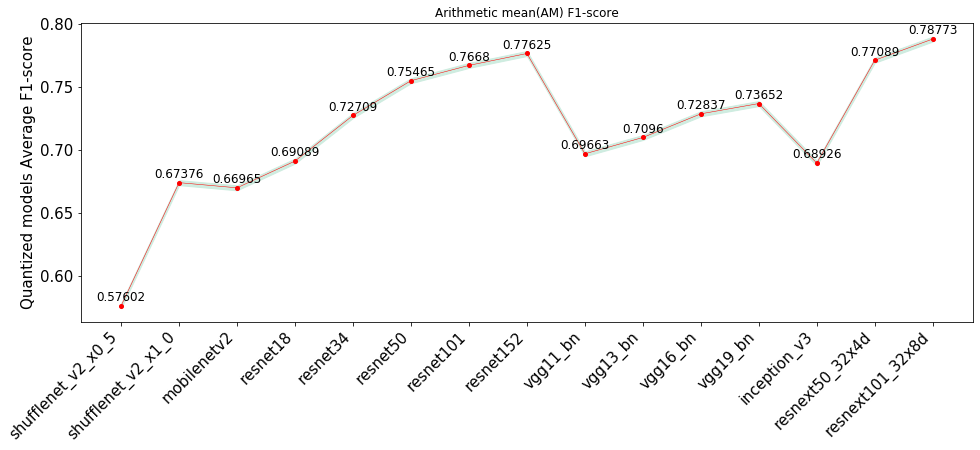

In [26]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_f1_score(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,5.5))

line1, = plt.plot(x_lable, model_mean_list, color='red', lw=0.5, ls='-', marker='o', ms=4)

plt.fill_between(x_lable, model_mean_list - model_mean_confinterval[0],model_mean_list + model_mean_confinterval[0], color=(204/256, 236/256, 223/256), alpha=0.9)

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 5), ha='center', va='bottom', fontsize=12)


plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
# plt.legend([line1], ["Arithmetic mean(AM)"], loc='upper right')
plt.title("Arithmetic mean(AM) F1-score")
plt.ylabel('Quantized models Average F1-score', fontsize = 15)
plt.savefig(save_root_path + "Average F1-score.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [27]:
def get_float32_model_f1_score(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld_float32.read_model_path(current_estimate_line)
        current_model_name = modelpath2modelname(model_path)
        model_name_list.append(current_model_name)
        select_model_id_list = rld_float32.find_special_line_id(model_path)
        a = rld_float32.read_line_vector(rld_float32.read_F1_score,select_model_id_list)
        current_model_result_list= eval('['+str(a).replace(' ','').replace('[','').replace(']','')+']')
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

[0.02288979 0.01637667 0.04551131 0.0020985  0.00253677 0.00367099
 0.0043686  0.00433707 0.00229341 0.00162017 0.00147533 0.00206184
 0.0048787  0.00237548 0.00282109]


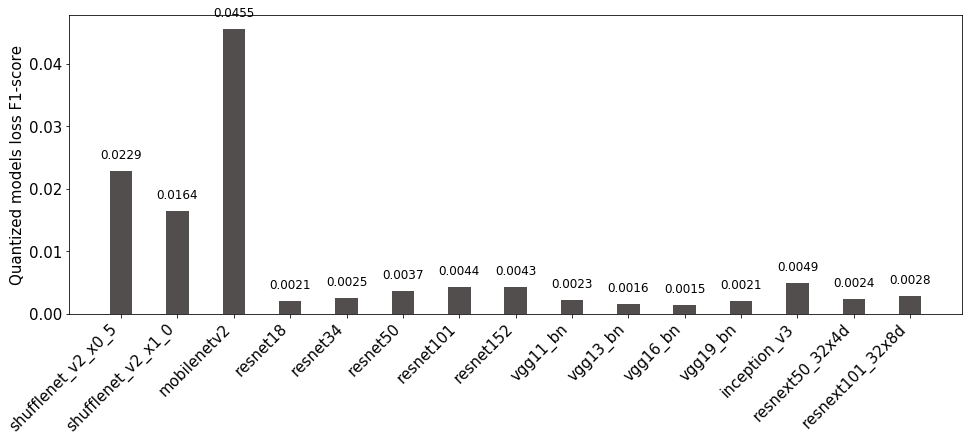

In [28]:
model_name_list1, model_float32_mean_list, model_mean_confinterval, model_float32_geo_mean_list, model_geo_mean_confinterval = get_float32_model_f1_score(check_float32_line_inception_list)
decrease_percentage = np.array(model_float32_mean_list) - np.array(model_mean_list)
print(decrease_percentage)


x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,5.5))

bar = plt.bar(x, decrease_percentage, bar_width, color=(82/256, 78/256, 78/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, decrease_percentage):
    plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)
    
plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Quantized models loss F1-score', fontsize = 15)
plt.savefig(save_root_path + "loss F1-score.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [29]:
def get_precision_score(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = modelpath2modelname(model_path)
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        a = rld.read_line_vector(rld.read_precision,select_model_id_list)
        current_model_result_list= eval('['+str(a).replace(' ','').replace('[','').replace(']','')+']')
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

In [30]:
def get_recall(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = modelpath2modelname(model_path)
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        a = rld.read_line_vector(rld.read_recall,select_model_id_list)
        current_model_result_list= eval('['+str(a).replace(' ','').replace('[','').replace(']','')+']')
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

In [31]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_recall(check_line_list)
model_name_list1, model_mean_list1, model_mean_confinterval1, model_geo_mean_list1, model_geo_mean_confinterval1 = get_precision_score(check_line_list)

# print(model_name_list)
# print(model_mean_list)
# print(model_mean_list1)

# print(model_mean_confinterval)
# print(model_geo_mean_list)
# print(model_geo_mean_confinterval)

# x_lable = model_name_list

# x = np.arange(0,len(x_lable))
# plt.figure(figsize=(len(x_lable)+1,5.5))

# # line1, = plt.plot(x_lable, model_mean_list, color='red', lw=0.5, ls='-', marker='o', ms=4)

# # plt.fill_between(x_lable, model_mean_list - model_mean_confinterval[0],model_mean_list + model_mean_confinterval[0], color=(204/256, 236/256, 223/256), alpha=0.9)


# line1, = plt.plot(x_lable, model_mean_list, color='red', lw=0.5, ls='-', marker='o', ms=4)
# line2, = plt.plot(x_lable, model_mean_list1, color='green', lw=0.5,  marker='^', ms=4)

# plt.fill_between(x_lable, model_mean_list - model_mean_confinterval[0],model_mean_list + model_mean_confinterval[0], color=(240/256, 86/256, 79/256), alpha=0.9)
# plt.fill_between(x_lable, model_mean_list1 - model_mean_confinterval1[0], model_mean_list1 + model_mean_confinterval1[0], color=(204/256, 236/256, 223/256), alpha=0.9)


# #show the bar spesific number
# for x_axis, a, b, c in zip(x, x_lable, model_mean_list, model_mean_list1):
#     plt.text(x_axis, b-0.01, round(b, 5), ha='center', va='bottom', fontsize=12, color='red')
#     plt.text(x_axis, c+0.01, round(c, 5), ha='center', va='bottom', fontsize=12, color='green')


# plt.xticks(rotation=45)
# plt.xticks(x,x_lable, horizontalalignment='right')
# plt.xticks(fontsize = 15)
# plt.yticks(fontsize = 15)
# plt.legend([line1,line2], ["Arithmetic Recall mean", "Arithmetic Precision mean"], loc='down right')
# plt.ylabel('Quantized models Average value', fontsize = 15)
# plt.savefig(save_root_path + "Average Recall and Precision.png",dpi=500,bbox_inches = 'tight')
# plt.show()

In [32]:
def get_float32_model_precision_score(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld_float32.read_model_path(current_estimate_line)
        current_model_name = modelpath2modelname(model_path)
        model_name_list.append(current_model_name)
        select_model_id_list = rld_float32.find_special_line_id(model_path)
        a = rld_float32.read_line_vector(rld_float32.read_precision,select_model_id_list)
        current_model_result_list= eval('['+str(a).replace(' ','').replace('[','').replace(']','')+']')
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

[0.02160949 0.01916599 0.04818475 0.0056389  0.0063113  0.00774723
 0.00838768 0.0079245  0.00563997 0.00543481 0.00610417 0.00607735
 0.01025391 0.0051437  0.00543982]


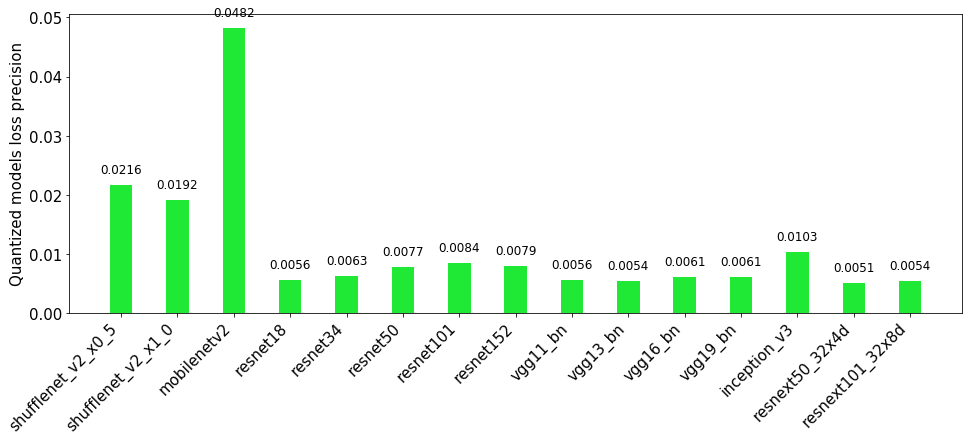

In [33]:
model_name_list1, model_float32_mean_list, model_mean_confinterval, model_float32_geo_mean_list, model_geo_mean_confinterval = get_float32_model_precision_score(check_float32_line_inception_list)
decrease_percentage = np.array(model_float32_mean_list) - np.array(model_mean_list)
print(decrease_percentage)


x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,5.5))

bar = plt.bar(x, decrease_percentage, bar_width, color=(32/256, 234/256, 54/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, decrease_percentage):
    plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)
    
plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Quantized models loss precision', fontsize = 15)
plt.savefig(save_root_path + "loss precision.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [34]:
def get_float32_model_recall(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld_float32.read_model_path(current_estimate_line)
        current_model_name = modelpath2modelname(model_path)
        model_name_list.append(current_model_name)
        select_model_id_list = rld_float32.find_special_line_id(model_path)
        a = rld_float32.read_line_vector(rld_float32.read_recall,select_model_id_list)
        current_model_result_list= eval('['+str(a).replace(' ','').replace('[','').replace(']','')+']')
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

[0.02288002 0.01588005 0.04565996 0.00224    0.00257999 0.00350004
 0.00423998 0.00405997 0.00231999 0.00172001 0.00161999 0.00216001
 0.00484002 0.00242001 0.00270003]


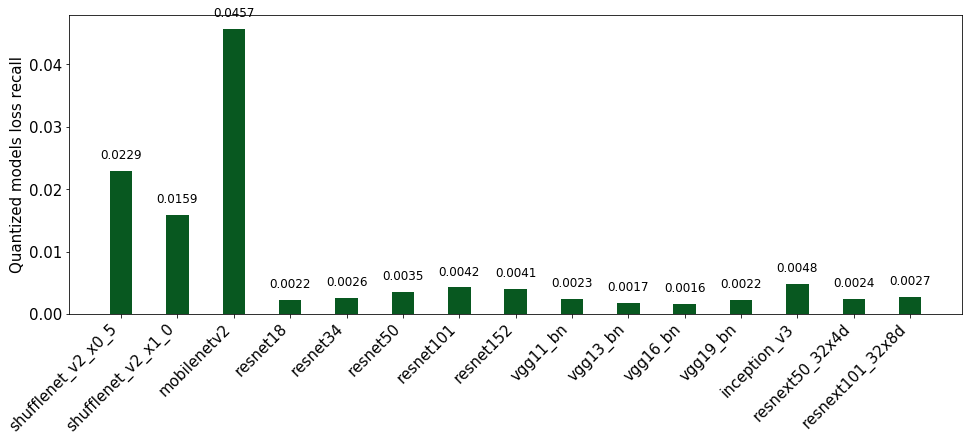

In [35]:
model_name_list1, model_float32_mean_list, model_mean_confinterval, model_float32_geo_mean_list, model_geo_mean_confinterval = get_float32_model_recall(check_float32_line_inception_list)
decrease_percentage = np.array(model_float32_mean_list) - np.array(model_mean_list)
print(decrease_percentage)


x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,5.5))

bar = plt.bar(x, decrease_percentage, bar_width, color=(8/256, 88/256, 32/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, decrease_percentage):
    plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)
    
plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Quantized models loss recall', fontsize = 15)
plt.savefig(save_root_path + "loss recall.png",dpi=500,bbox_inches = 'tight')
plt.show()